# Helicopter Escapes!


We begin by importing some helper functions.

In [4]:
from helper import *

## Get the Data

We used the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article. Extracted the table using Excel Get Data Feature

In [25]:
path = "1ex.csv"
data = data_from_source(path)

In [26]:
for row in data[:3]:
    date = row[0]
    year = fetch_year(date)
    print(year)

1971
1973
1978


## Removing the Details

We initialize an index variable with the value of 0. The purpose of this variable is to help us track which row we're modifying.

In [29]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [30]:
print(data[:3])

[['19-08-1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro'], ['31-10-1973', 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'HaganSeamus TwomeyKevin Mallon"], ['24-05-1978', 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Extracting the Year

In the code cell below, we iterate over data using the iterable variable row and: * With every occurrence of row[0], we refer to the first entry of row, i.e., the date. * Thus, with date = fetch_year(row[0]), we're extracting the year out of the date in row[0] and assiging it to the variable date. * We then replace the value of row[0] with the year that we just extracted.

In [39]:
for row in data:
    date = fetch_year(row[0])
    row[0] = pd.to_numeric(date)

In [41]:
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'HaganSeamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Attempts per Year

In [44]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

Before we move on, let's check what are the earliest and latest dates we have in our dataset.

In [47]:
print(min_year)
print(max_year)

1971
2020


Now we'll create a list of all the years ranging from min_year to max_year. Our goal is to then determine how many prison break attempts there were for each year. Since years in which there weren't any prison breaks aren't present in the dataset, this will make sure we capture them.

In [50]:
years = []
for year in range(min_year, max_year + 1):
    years.append(year)

Let's take a look at years to see if it looks like we expected.

In [53]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Looks good!

Now we create a list where each element looks like [<year>, 0].

In [56]:
attempts_per_year = []
for year in years:
    attempts_per_year.append([year, 0])

In [58]:
print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


And finally we increment the second entry (the one on index 1 which starts out as being 0) by 1 each time a year appears in the data.

In [61]:
for row in data:
    for year_attempt in attempts_per_year:
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1
            
print(attempts_per_year)    

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 3], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


### In which year did the most attempts at breaking out of prison with a helicopter occur?

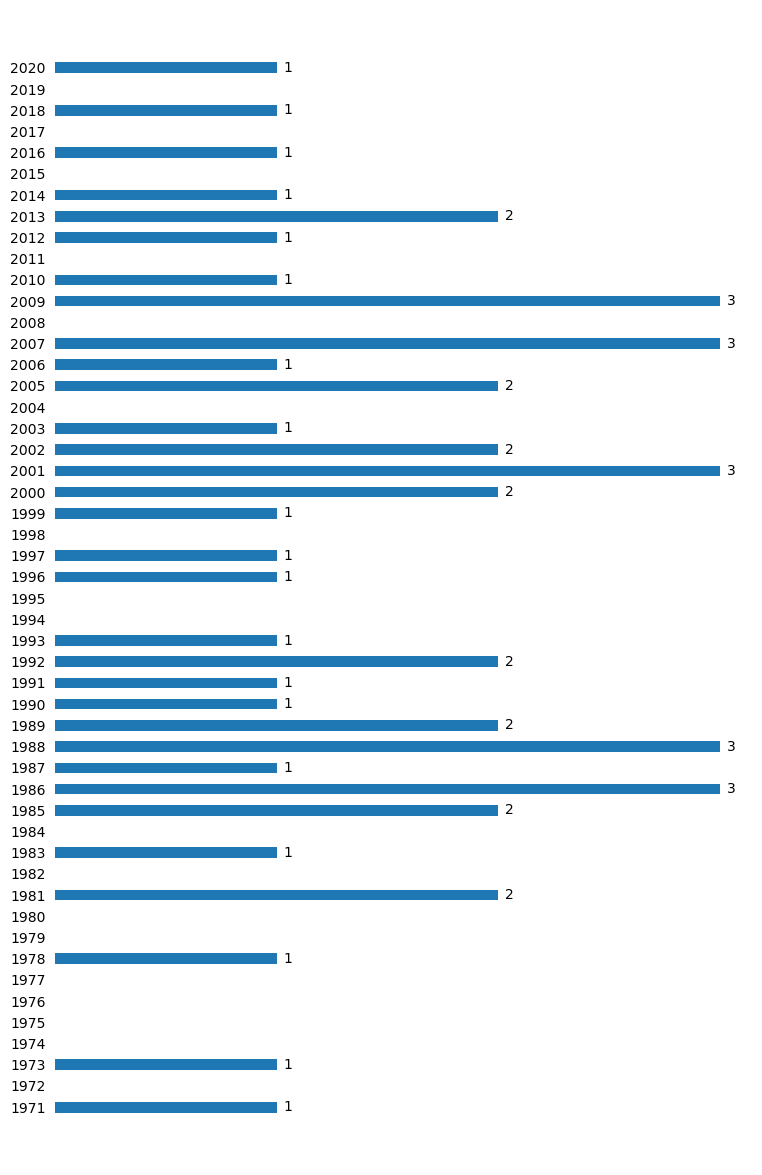

In [72]:
%matplotlib inline
barplot(attempts_per_year)

The years in which the most helicopter prison break attempts occurred were 1986, 2001, 2007 and 2009, with a total of three attempts each.

## Attempts by Country

### In which countries do the most attempted helicopter prison escapes occur?

In [76]:
countries_frequency = df.groupby("Country").value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Colombia,2
Mexico,1


By and far, the country with the most helicopter prison escape attempts is France.